In [1]:
import pandas as pd
import os

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)

## Generation timeseries 
- Imports timeseries for different timeframes
- Converts str into numeric dataframe

In [2]:
cwd = os.getcwd()
# generation_2018_path = os.path.join(cwd, "generation-20180101-20180401.csv")
# generation_2019_path = os.path.join(cwd, "generation-20190101-20190401.csv")
# generation_2020_path = os.path.join(cwd, "generation-20200101-20200401.csv")
# generation_2021_path = os.path.join(cwd, "generation-20210101-20210401.csv")
# generation_2022_path = os.path.join(cwd, "generation-20220101-20220401.csv")

generation_2018_path = os.path.join(cwd, "generation-20180101-20190101.csv")
generation_2019_path = os.path.join(cwd, "generation-20190101-20200101.csv")
generation_2020_path = os.path.join(cwd, "generation-20200101-20210101.csv")
generation_2021_path = os.path.join(cwd, "generation-20210101-20220101.csv")
generation_2022_path = os.path.join(cwd, "generation-20220101-20220401.csv")
generation_t1_path = os.path.join(cwd, "generation_gas_germany_2019.csv")

generation_2018 = pd.read_csv(generation_2018_path, index_col=0)
generation_2019 = pd.read_csv(generation_2019_path, index_col=0)
generation_2020 = pd.read_csv(generation_2020_path, index_col=0)
generation_2021 = pd.read_csv(generation_2021_path, index_col=0)
generation_2022 = pd.read_csv(generation_2022_path, index_col=0)
generation_t1 = pd.read_csv(generation_t1_path, index_col=0)

/tmp/ipykernel_135551/698213827.py:15: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72) have mixed types. Specify dtype option on import or set low_memory=False.
  generation_2018 = pd.read_csv(generation_2018_path, index_col=0)
/tmp/ipykernel_135551/698213827.py:16: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74) have mixed types. Specify dtype option on import or set low_memory=False.
  generation_2019 = pd.read_csv(generation_2019_path, index_col=0)
/tmp/ipykernel_135551/698213827.py:17: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40

In [3]:
generation_2018 = generation_2018.iloc[2:,:]
generation_2018 = generation_2018.apply(pd.to_numeric)

generation_2019 = generation_2019.iloc[2:,:]
generation_2019 = generation_2019.apply(pd.to_numeric)

generation_2020 = generation_2020.iloc[2:,:]
generation_2020 = generation_2020.apply(pd.to_numeric)

generation_2021 = generation_2021.iloc[2:,:]
generation_2021 = generation_2021.apply(pd.to_numeric)

generation_2022 = generation_2022.iloc[2:,:]
generation_2022 = generation_2022.apply(pd.to_numeric)

In [4]:
df2018 = pd.DataFrame(generation_2018.sum(axis=1).values)
df2018["year"] = pd.DatetimeIndex(generation_2018.index.values).year
xlabel = pd.DataFrame({'snapshot':pd.date_range("2019-01-01", periods=len(generation_2020), freq="H")})
df2018["time"] = xlabel.snapshot.dt.strftime('%d-%B %H:00')

df2019 = pd.DataFrame(generation_2019.sum(axis=1).values)
df2019["year"] = pd.DatetimeIndex(generation_2019.index.values).year
xlabel = pd.DataFrame({'snapshot':pd.date_range("2019-01-01", periods=len(generation_2020), freq="H")})
df2019["time"] = xlabel.snapshot.dt.strftime('%d-%B %H:00')

df2020 = pd.DataFrame(generation_2020.sum(axis=1).values)
df2020["year"] = pd.DatetimeIndex(generation_2020.index.values).year
xlabel = pd.DataFrame({'snapshot':pd.date_range("2019-01-01", periods=len(generation_2020), freq="H")})
df2020["time"] = xlabel.snapshot.dt.strftime('%d-%B %H:00')

df2021 = pd.DataFrame(generation_2021.sum(axis=1).values)
df2021["year"] = pd.DatetimeIndex(generation_2021.index.values).year
xlabel = pd.DataFrame({'snapshot':pd.date_range("2019-01-01", periods=len(generation_2020), freq="H")})
df2021["time"] = xlabel.snapshot.dt.strftime('%d-%B %H:00')

df2022 = pd.DataFrame(generation_2022.sum(axis=1).values)
df2022["year"] = pd.DatetimeIndex(generation_2022.index.values).year
xlabel = pd.DataFrame({'snapshot':pd.date_range("2019-01-01", periods=len(generation_2020), freq="H")})
df2022["time"] = xlabel.snapshot.dt.strftime('%d-%B %H:00')


frames = [df2018, df2019, df2020, df2021, df2022]
df_total = pd.concat(frames).rename(columns={0:"p"})
df_total = df_total.reset_index().rename(columns={"index":"snapshot"})
df_total["p"] = df_total["p"].rolling(24*7,center=True,min_periods=1).mean()/1000  # 1 week smoothing and GW conversion


(0.0, 8783.0)

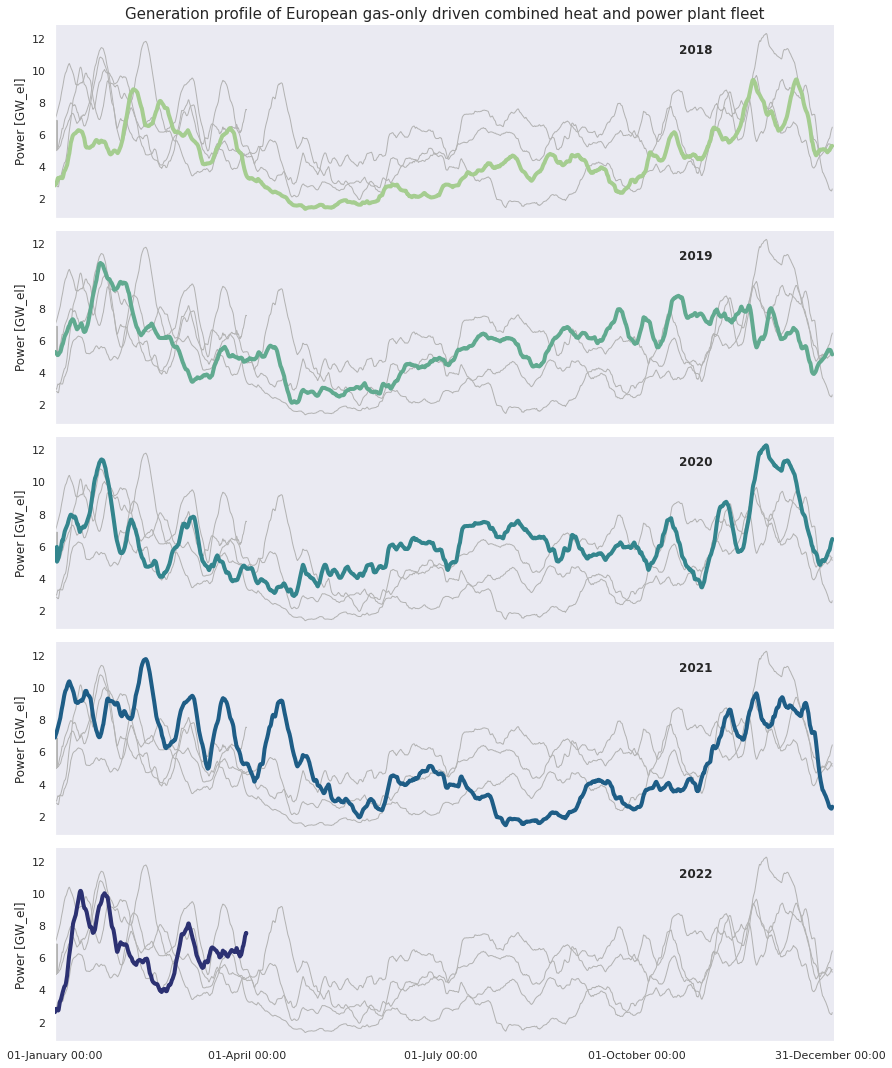

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="dark")


# Plot each year's time series in its own facet
g = sns.relplot(
    data=df_total,
    x="time", y="p", col="year", hue="year",
    kind="line", palette="crest", linewidth=4, zorder=5,
    col_wrap=1, height=3, aspect=4, legend=False,
)

# Iterate over each subplot to customize further
for year, ax in g.axes_dict.items():

    if year == 2018:
        ax.set_title("Generation profile of European gas-only driven combined heat and power plant fleet", fontsize=15)
    else:
        ax.set_title("")
    # Add the title as an annotation within the plot
    ax.text(.8, .85, year, transform=ax.transAxes, fontweight="bold")

    # Plot every year's time series in the background
    sns.lineplot(
        data=df_total, x="time", y="p", units="year",
        estimator=None, color=".7", linewidth=1, ax=ax,
    )

# Reduce the frequency of the x axis ticks
ticks = [
df_total[df_total["time"]=="01-January 00:00"].index[0],
df_total[df_total["time"]=="01-April 00:00"].index[0],
df_total[df_total["time"]=="01-July 00:00"].index[0],
df_total[df_total["time"]=="01-October 00:00"].index[0],
df_total[df_total["time"]=="31-December 00:00"].index[0],
]
ax.set_xticks(ticks)

# Tweak the supporting aspects of the plot

g.set_axis_labels("", "Power [GW_el]")
g.tight_layout()
plt.xlim([0, len(generation_2020)])



In [140]:
(
generation_2022.sum(axis=1).min()
+generation_2021.sum(axis=1).min()
+generation_2020.sum(axis=1).min()
+generation_2019.sum(axis=1).min()
+generation_2018.sum(axis=1).min()
)/5


838.8

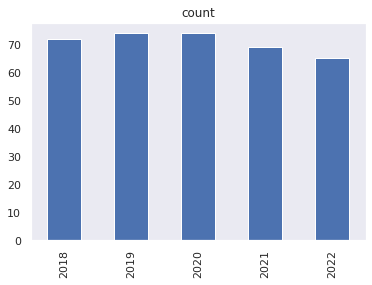

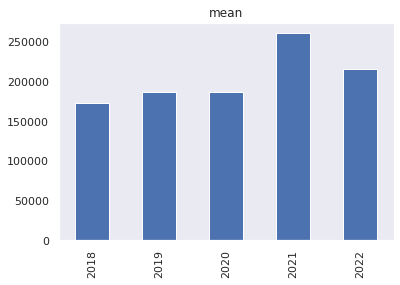

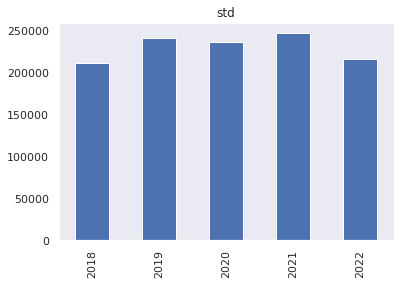

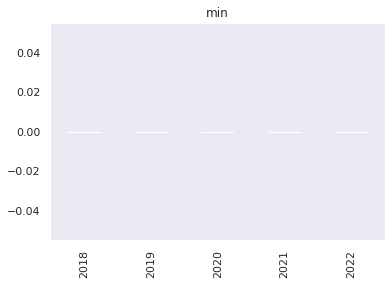

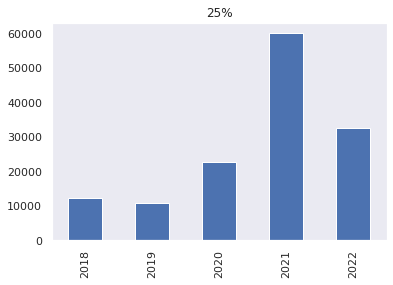

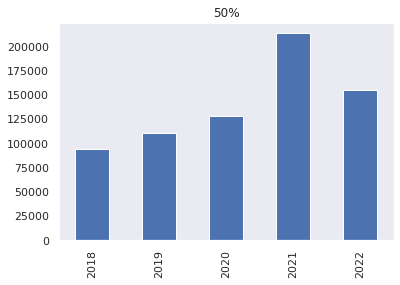

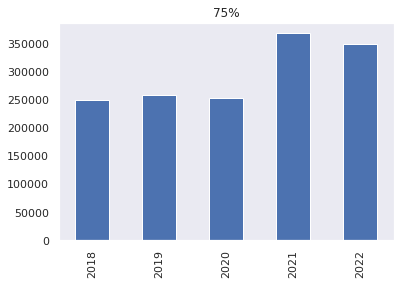

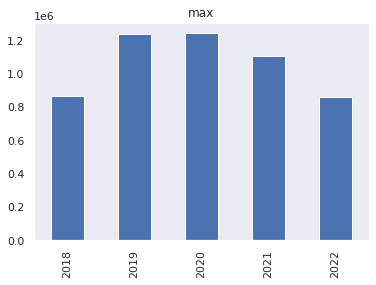

In [131]:
import numpy as np

genstats2018 = pd.DataFrame(generation_2018.loc["2018-01-01 00:00:00+00:00":"2018-04-01 00:00:00+00:00"].sum().describe()).rename(columns={0:2018}).T
genstats2019 = pd.DataFrame(generation_2019.loc["2019-01-01 00:00:00+00:00":"2019-04-01 00:00:00+00:00"].sum().describe()).rename(columns={0:2019}).T
genstats2020 = pd.DataFrame(generation_2020.loc["2020-01-01 00:00:00+00:00":"2020-04-01 00:00:00+00:00"].sum().describe()).rename(columns={0:2020}).T
genstats2021 = pd.DataFrame(generation_2021.loc["2021-01-01 00:00:00+00:00":"2021-04-01 00:00:00+00:00"].sum().describe()).rename(columns={0:2021}).T
genstats2022 = pd.DataFrame(generation_2022.loc["2022-01-01 00:00:00+00:00":"2022-04-01 00:00:00+00:00"].sum().describe()).rename(columns={0:2022}).T

genstats = pd.concat([genstats2018,genstats2019,genstats2020,genstats2021,genstats2022])

for e in range(len(genstats.columns)):
    genstats.iloc[:,e].plot(kind="bar", title=genstats.columns[e])
    plt.show()



In [132]:
genstats

,count,mean,std,min,25%,50%,75%,max
2018,72.0,173738.375000,211837.175839,0.0,12165.25,94423.5,249565.75,869250.0
2019,74.0,186860.810811,241729.230995,0.0,10713.50,110820.5,258660.25,1237143.0
2020,74.0,187221.972973,235936.510430,0.0,22744.50,128738.0,253526.25,1243389.0
2021,69.0,261210.275362,246956.205104,0.0,59996.00,213623.0,368045.00,1104699.0
2022,65.0,215673.646154,216001.156770,0.0,32469.00,155509.0,348605.00,857665.0


## Generation capacity
- Import powerplants
- Filters Germany
- Filter CHP 

In [ ]:
cwd = os.getcwd()
ppm_generation_path = os.path.join(cwd, "ppm-powerplants.csv")
pypsaeur_generation_path = os.path.join(cwd, "pypsaeur-powerplants.csv")
ppm_powerplants = pd.read_csv(ppm_generation_path, index_col=0)
ppm_powerplants

In [ ]:
ppm_powerplants = ppm_powerplants.loc[ppm_powerplants["Country"]=="Germany", :]
ppm_powerplants = ppm_powerplants.loc[ppm_powerplants["Set"]=="CHP", :]
ppm_powerplants = ppm_powerplants.loc[ppm_powerplants["Fueltype"]=="Natural Gas", :]

In [ ]:
ppm_powerplants
